In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from os import walk
import numpy as np
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/evaluation/synthetic/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/data/travis/'
plot_output_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/plots_for_paper/'

In [2]:
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)          # controls default text sizes
plt.rcParams["figure.figsize"] = (10,5) 
plt.rcParams["font.family"] = "serif"
colors = sns.color_palette('deep')

In [4]:
score_data = pd.read_csv(experiment_result_folder + '2000' + '_indel_diff_evaluation_plot.csv')

In [6]:
score_data

,protein_family,method,score
0,t2000d1s0.5,sicp,3069
1,t2000d1s0.5,bep,2897
2,t2000d1s0.5,psp,2900
3,t2000d1s0.5,bep,2897
4,t2000d1s0.5,psp,2900
...,...,...,...
89,t2000d0.8s1,psp,3733
90,t2000d0.8s1,bep,3756
91,t2000d0.8s1,psp,3733
92,t2000d0.8s1,mip,3669


In [ ]:
score_data.pivot(index='protein_family', columns='method', values='score').reset_index()

# 1 - DIFFERENCE IN INDEL EVENTS

extant_size 300


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/3745917267.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


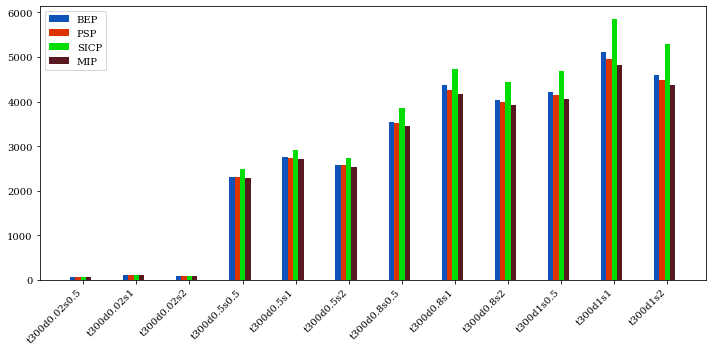

extant_size 500


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/3745917267.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


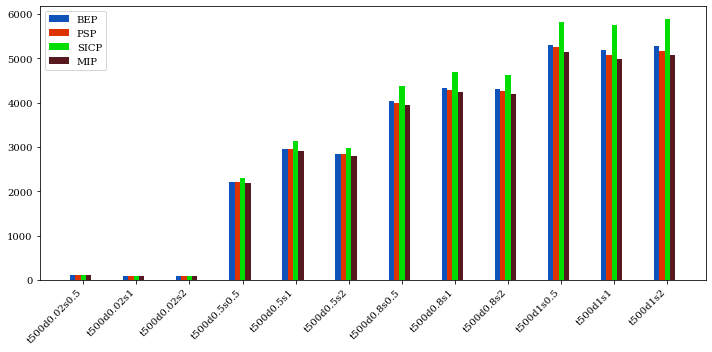

extant_size 700


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/3745917267.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


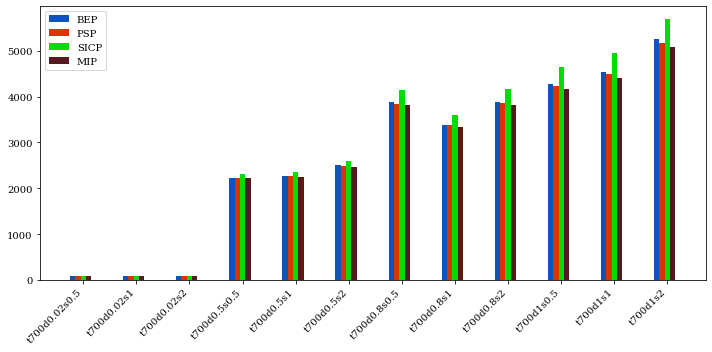

extant_size 1000


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/3745917267.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


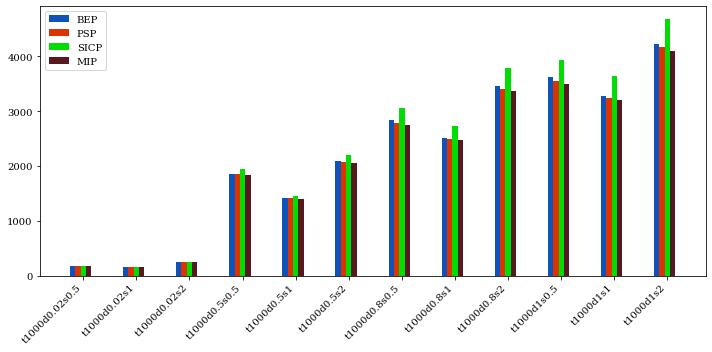

extant_size 2000


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/3745917267.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


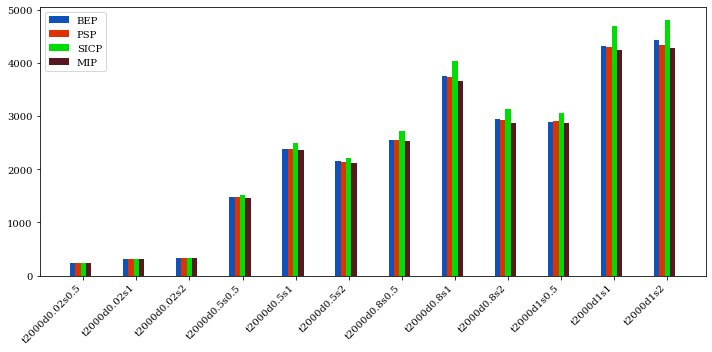

In [7]:
# read all score files for all protein families in the folder

for extant_size in ['300','500','700','1000','2000']: 
    with open(experiment_result_folder + extant_size + '_indel_diff_evaluation_plot.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*indscore*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )

    cat_order = []
    for d in ['0.02','0.5','0.8','1','2']:
        for s in ['0.5','1','2']:
            cat_order.append('t' + extant_size + 'd' + d + 's' + s)
            
    score_data = pd.read_csv(experiment_result_folder + extant_size + '_indel_diff_evaluation_plot.csv')
    score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
    score_data = score_data.sort_values(['protein_family',"method"])
    score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()
    
        
    labels = score_data['protein_family']
    x = np.arange(len(labels)) 
    width = 0.2
    fig,ax1 = plt.subplots(tight_layout=True)
    rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
    rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
    rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
    rects4 = ax1.bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
    ymin, ymax = plt.ylim()

        
#     ax1.set_ylabel('Indel Score')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
#     ax1.set_xlabel('Syntheic Dataset')
    plt.xticks(rotation=45,ha="right")
    ax1.legend(loc="upper left")
    bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
    filename = plot_output_folder + extant_size + "_synthetic_indel_score_comparison_plot.jpg"
    fig.savefig(filename,dpi=1000)
    fig.tight_layout()
    plt.show()

# 2 - OUT OF DISTRIBUTION PATTERNS


/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/2993168458.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


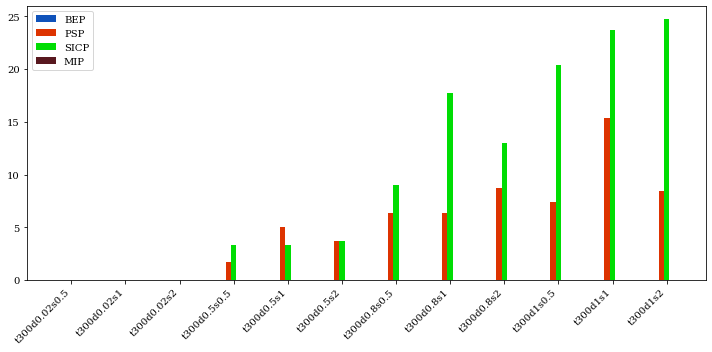

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/2993168458.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


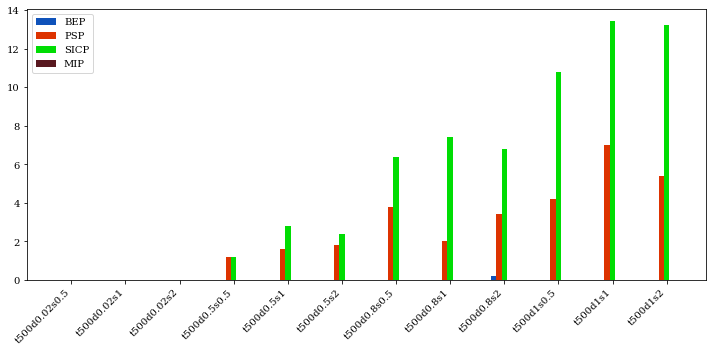

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/2993168458.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


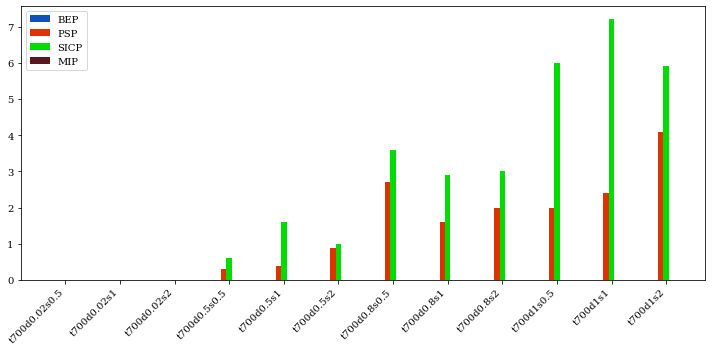

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/2993168458.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


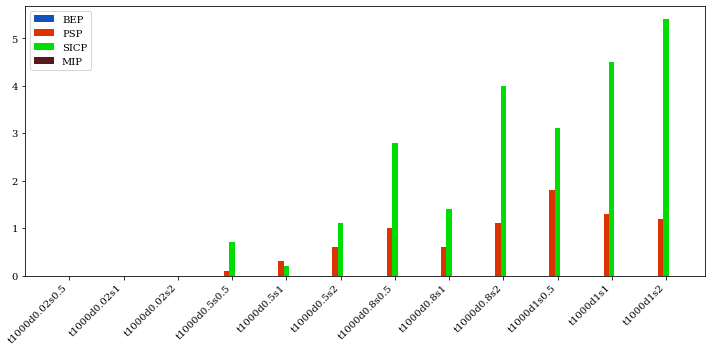

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/2993168458.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


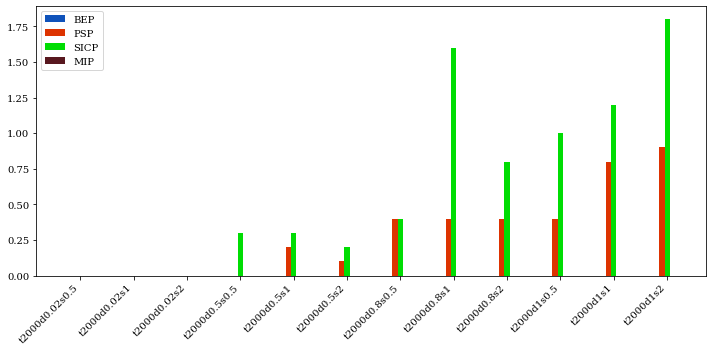

In [8]:
for extant_size in ['300','500','700','1000','2000']: 
#     print(f"extant_size {extant_size}")
    with open(experiment_result_folder + extant_size + '_out_of_dist_evaluation_plot.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*out_dist_percent*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )

    cat_order = []
    for d in ['0.02','0.5','0.8','1','2']:
        for s in ['0.5','1','2']:
            cat_order.append('t' + extant_size + 'd' + d + 's' + s)
            
    score_data = pd.read_csv(experiment_result_folder + extant_size + '_out_of_dist_evaluation_plot.csv')
    score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
    score_data = score_data.sort_values(['protein_family',"method"])
    score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()    
        
    labels = score_data['protein_family']
    x = np.arange(len(labels)) 
    width = 0.2
    fig,ax1 = plt.subplots(tight_layout=True)
    rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
    rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
    rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
    rects4 = ax1.bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
    ymin, ymax = plt.ylim()
        
#     ax1.set_ylabel('% ancestors with out of distribution pattern')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
#     ax1.set_xlabel('Syntheic Dataset')
    plt.xticks(rotation=45,ha="right")
    ax1.legend(loc="upper left")
    bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
    filename = plot_output_folder + extant_size + "_synthetic_out_of_dist_comparison_plot.jpg"
    fig.savefig(filename,dpi=1000)
    fig.tight_layout()
    plt.show()

# 3 - COHESIVENESS MEASURE

### 3.1 -  SITES WITH 3 MUTATION AWAY FROM ITS NEIGHBOURS

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/1832592836.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


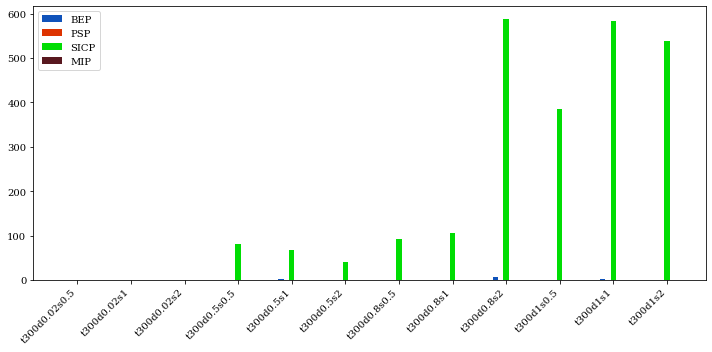

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/1832592836.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


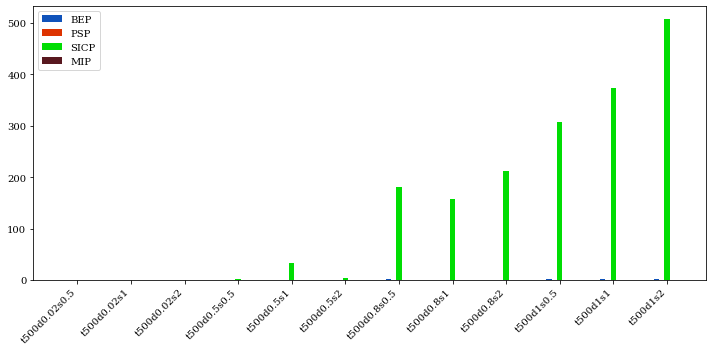

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/1832592836.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


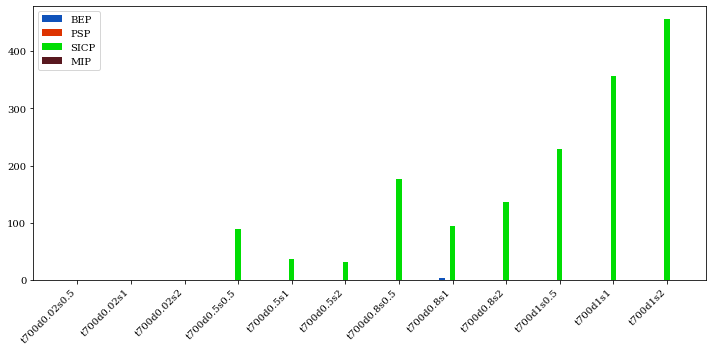

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/1832592836.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


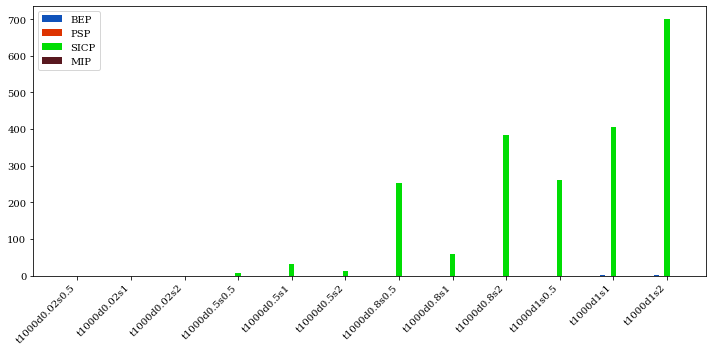

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/1832592836.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


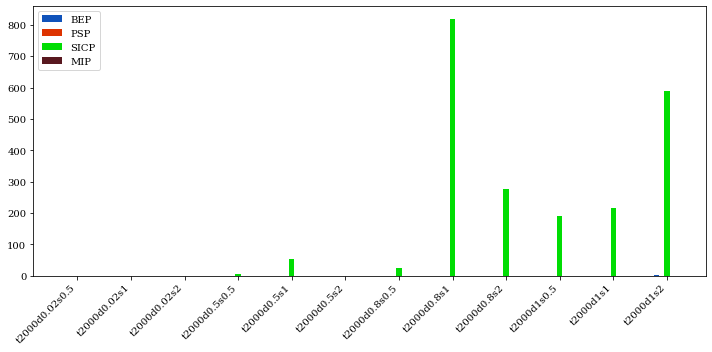

In [9]:
for extant_size in ['300','500','700','1000','2000']: 
    with open(experiment_result_folder + extant_size + '_sites_with_3_mut_plot.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*sites_with_3_mut*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )

    cat_order = []
    for d in ['0.02','0.5','0.8','1','2']:
        for s in ['0.5','1','2']:
            cat_order.append('t' + extant_size + 'd' + d + 's' + s)
            
    score_data = pd.read_csv(experiment_result_folder + extant_size + '_sites_with_3_mut_plot.csv')
    score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
    score_data = score_data.sort_values(['protein_family',"method"])
    score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()
        
        
    labels = score_data['protein_family']
    x = np.arange(len(labels)) 
    width = 0.2
    fig,ax1 = plt.subplots(tight_layout=True)
    rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
    rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
    rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
    rects4 = ax1.bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
    ymin, ymax = plt.ylim()
        
        
#     ax1.set_ylabel('# sites 3 mutations away from its neighbours')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
#     ax1.set_xlabel('Protein Family')
    plt.xticks(rotation=45,ha="right")
    ax1.legend(loc="upper left")
    bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
    filename = plot_output_folder + extant_size + "_synthetic_sites_3_mutation_comparison_plot.jpg"
    fig.savefig(filename,dpi=1000)
    fig.tight_layout()
    plt.show()

### 3.2 -  ANCESTORS WITH 2 MUTATION AWAY FROM ITS NEIGHBOURS

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/532728904.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


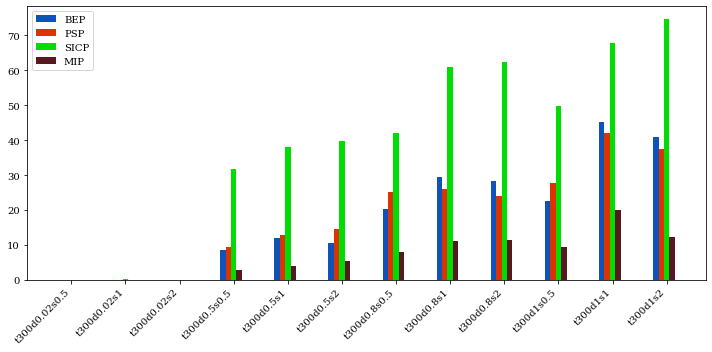

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/532728904.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


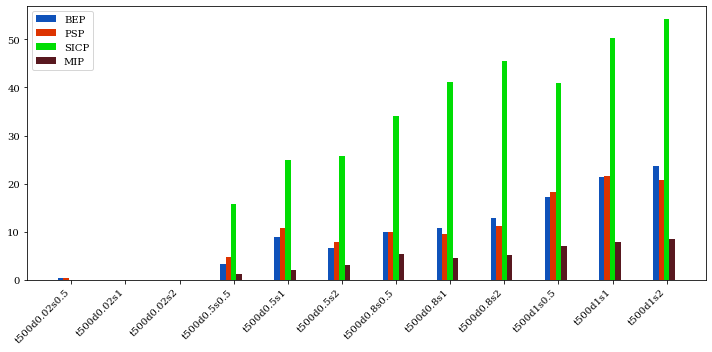

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/532728904.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


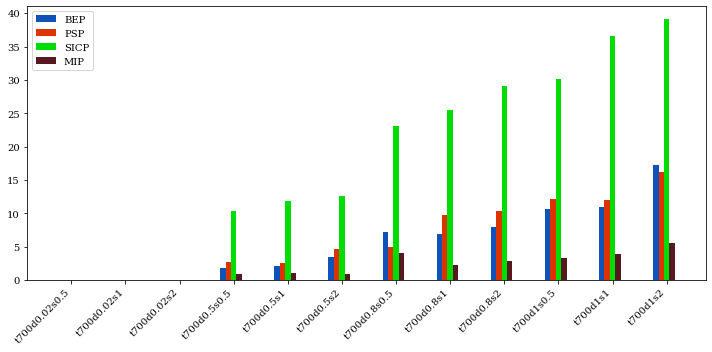

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/532728904.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


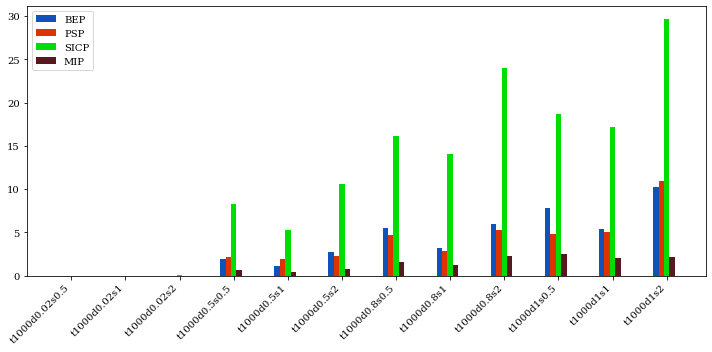

/var/folders/6g/6gy05kt92q5478c3_f84df280000gn/T/ipykernel_73435/532728904.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


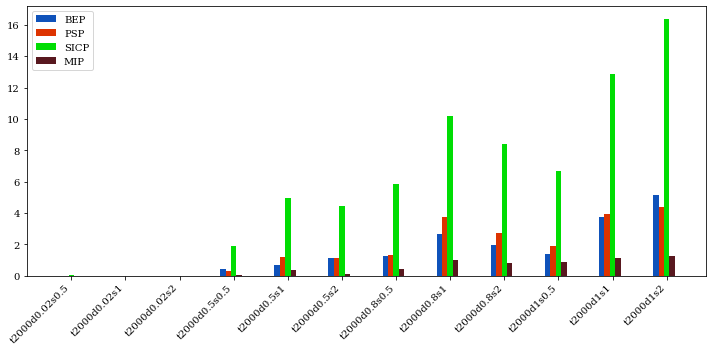

In [10]:
for extant_size in ['300','500','700','1000','2000']: 
    with open(experiment_result_folder + extant_size + '_ancestors_2_mutation_away.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*ancestors_with_2_mut*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )

    cat_order = []
    for d in ['0.02','0.5','0.8','1','2']:
        for s in ['0.5','1','2']:
            cat_order.append('t' + extant_size + 'd' + d + 's' + s)
            
    score_data = pd.read_csv(experiment_result_folder + extant_size + '_ancestors_2_mutation_away.csv')
    score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
    score_data = score_data.sort_values(['protein_family',"method"])
    score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()
           
    labels = score_data['protein_family']
    x = np.arange(len(labels)) 
    width = 0.2
    fig,ax1 = plt.subplots(tight_layout=True)
    rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
    rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
    rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
    rects4 = ax1.bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
    ymin, ymax = plt.ylim()

#     ax1.set_ylabel('% ancestors with 2 mutations away from its neighbours')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
#     ax1.set_xlabel('Protein Family')
    plt.xticks(rotation=45,ha="right")
    ax1.legend(loc="upper left")
    bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
    filename = plot_output_folder + extant_size + "_synthetic_ancestors_percent_2_mutation_comparison_plot.jpg"
    fig.savefig(filename,dpi=1000)
    fig.tight_layout()
    plt.show()